# PyTorch Tensors

In [233]:
import torch
torch.manual_seed(0) # for reproducability

## Tensor Init

In [234]:
arr = [1,2]
tensor = torch.tensor(arr)
val = 2.0
tensor = torch.tensor(val)

In [235]:
import numpy as np
np_arr = np.array([1,2])
x_t = torch.from_numpy(np_arr)

In [236]:
zeros_t = torch.zeros((2,3)) # Returns 2x3 tensor of zeros
ones_t = torch.ones((2,3)) # Returns 2x3 tensor of ones
rand_t = torch.randn((2,3)) # Returns 2x3 tensor of random numbers

## Tensor Attributes

In [237]:
zeros_t.shape # Returns torch.Size([2, 3])

torch.Size([2, 3])

In [238]:
x_t = torch.tensor(2.0)
x_t.dtype # Returns torch.float32

torch.float32

In [239]:
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32)

In [240]:
x_t.device # Returns device(type='cpu') by default

device(type='cpu')

In [241]:
# PyTorch will use GPU if it's available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
arr = [1,2]
x_t = torch.tensor(arr, dtype=torch.float32, device=device)

In [242]:
x_t = x_t.to(device, dtype=torch.int)

## Tensor Operations

In [243]:
c = 10
x_t = x_t*c

In [244]:
x1_t = torch.zeros((1,2))
x2_t = torch.ones((1,2))
x1_t + x2_t
# returns tensor([[1., 1.]])

tensor([[1., 1.]])

In [245]:
x1_t = torch.tensor([[1,2],[3,4]])
x2_t = torch.tensor([[1,2,3],[4,5,6]])
torch.matmul(x1_t, x2_t) # Returns tensor([[9,12,15],[19,26,33]])

tensor([[ 9, 12, 15],
        [19, 26, 33]])

In [246]:
i,j,k = 0,1,1
x3_t = torch.tensor([[[3,7,9],[2,4,5]],[[8,6,2],[3,9,1]]])
print(x3_t)
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 5]],
#         [[8, 6, 2],
#          [3, 9, 1]]])

x3_t[i,j,k]
# out:
# tensor(4)

tensor([[[3, 7, 9],
         [2, 4, 5]],

        [[8, 6, 2],
         [3, 9, 1]]])


tensor(4)

In [247]:
x3_t[0] # Returns the matrix at position 0 in tensor
x3_t[0,:,:] # Also returns the matrix at position 0 in tensor!
# out:
# tensor([[3, 7, 9],
#         [2, 4, 1]])

tensor([[3, 7, 9],
        [2, 4, 5]])

In [248]:
x3_t[0,1:3,:]
# returns tensor([[2, 4, 5]])

tensor([[2, 4, 5]])

In [249]:
x3_t[0,1,2] = 1
# out:
# tensor([[[3, 7, 9],
#          [2, 4, 1]],

#         [[8, 6, 2],
#          [3, 9, 1]]])

In [250]:
x_t = torch.randn(2,3,4)
sub_tensor = torch.randn(2,4)
x_t[0,1:3,:] = sub_tensor

In [251]:
x_t[0,1:3,:] = 1
sub_tensor = torch.randn(1,4)
x_t[0,1:3,:] = sub_tensor

#Gradients in PyTorch

In [252]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2
f.backward()
x.grad, y.grad, z.grad
# out:
# (tensor(4.), tensor(6.), tensor(3.))

(tensor(4.), tensor(6.), tensor(3.))

# The PyTorch nn module

In [253]:
import torch.nn as nn

### Define Neural Network Learning Model

<p> Initialize weight matrix for feed-forward neural network</p>

In [254]:
in_dim, out_dim = 256, 10       # input vector dimension, output vector dimension
vec = torch.randn(256)          # return tensor of random numbers
layer = nn.Linear(in_dim, out_dim, bias=True)   # Linear() is an abstraction of the next cell
out = layer(vec)

print(out)

tensor([-2.8447e-01, -9.3781e-02,  5.3478e-04, -2.6831e-01, -3.1255e-01,
        -8.0501e-01,  9.6301e-02, -3.2780e-01,  1.0920e-01, -2.1979e-01],
       grad_fn=<AddBackward0>)


<p> Manually compute the weights and bias </p>

In [255]:
W = torch.rand(10,256)
b = torch.zeros(10,1)
out = torch.matmul(W, vec) + b

print(out)

tensor([[ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,  -8.8740, -10.0773,   3.9237,
         -10.9351,  -8.6859,  -9.2785],
        [ -6.5247,  -4.6500,  -0.5075,  -5.0551,

<p> Neural network to represent W2(W1 * x +b1) + b2 </p>

In [256]:
in_dim, feature_dim, out_dim = 784, 256, 10
vec = torch.randn(784)
layer1 = nn.Linear(in_dim, feature_dim, bias=True)
layer2 = nn.Linear(feature_dim, out_dim, bias=True)
out = layer2(layer1(vec))

<p> Introduce non-linearity with ReLU </p>

In [257]:
relu = nn.ReLU()
out = layer2(relu(layer1(vec)))

Example class of the neural network that was just defined

In [258]:
class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.layer1 = nn.Linear(in_dim, feature_dim, bias=True)
    self.layer2 = nn.Linear(feature_dim, out_dim, bias=True)
    self.relu = nn.ReLU()

# Feed forward
  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    out = self.layer2(x)
    return out

In [259]:
no_examples = 10
in_dim, feature_dim, out_dim = 784, 256, 10
x = torch.randn((no_examples, in_dim))
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
out = classifier(x)

In [260]:
loss = nn.CrossEntropyLoss()
target = torch.tensor([0,3,2,8,2,9,3,7,1,6])
computed_loss = loss(out, target)
computed_loss.backward()

In [261]:
for p in classifier.parameters():
  print(p.shape)

# out:
# torch.Size([256, 784])
# torch.Size([256])
# torch.Size([10, 256])
# torch.Size([10])

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [262]:
from torch import optim

lr = 1e-3
optimizer = optim.SGD(classifier.parameters(), lr=lr)

In [263]:
optimizer.step() # Updates parameters via SGD
optimizer.zero_grad() # Zeroes out gradients between minibatches

# PyTorch Datasets and Dataloaders

In [264]:
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [265]:
import numpy as np
labels = np.array([2, 0, 4, 1])
np.save('labels',labels)

In [266]:
labels_1 = np.load('labels.npy')
labels_1

array([2, 0, 4, 1])

### First download files for use in custom ImageDataset example

In [267]:
!mkdir -p data
!mkdir -p data/train

!wget -O data/train/img_0.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_0.jpg
!wget -O data/train/img_1.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_1.jpg
!wget -O data/train/img_2.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_2.jpg
!wget -O data/train/img_3.jpg -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/img_3.jpg
!wget -O data/train/labels.npy -nc -q https://github.com/darksigma/Fundamentals-of-Deep-Learning-Book/raw/master/ch05_implementing_nn_pytorch/data/train/labels.npy

In [268]:
import os
from PIL import Image
from torchvision import transforms

class ImageDataset(Dataset):
  def __init__(self, img_dir, label_file):
    super(ImageDataset, self).__init__()
    self.img_dir = img_dir
    self.labels = torch.tensor(np.load(label_file, allow_pickle=True))
    self.transforms = transforms.ToTensor()
  
  def __getitem__(self, idx):
    img_pth = os.path.join(self.img_dir, "img_{}.jpg".format(idx))
    img = Image.open(img_pth)
    img = self.transforms(img).flatten()
    label = self.labels[idx]
    return {"data":img, "label":label}
  
  def __len__(self):
    return len(self.labels)

In [269]:
train_dataset = ImageDataset(img_dir='./data/train/',
                             label_file='./data/train/labels.npy')

train_loader = DataLoader(train_dataset, 
                          batch_size=4, 
                          shuffle=True)

In [270]:
for minibatch in train_loader:
  data, labels = minibatch['data'], minibatch['label']
  print(data)
  print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([1, 2, 0, 4])


# Building the MNIST Classifer in PyTorch

In [271]:
import matplotlib.pyplot as plt
import torch
from torch import optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# For reproducability
torch.manual_seed(0)

In [272]:
class BaseClassifier(nn.Module):
  def __init__(self, in_dim, feature_dim, out_dim):
    super(BaseClassifier, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(in_dim, feature_dim, bias=True),
        nn.ReLU(),
        nn.Linear(feature_dim, out_dim, bias=True)
    )
    
  def forward(self, x):
    return self.classifier(x)
    

# Load in MNIST dataset from PyTorch
train_dataset = MNIST(".", train=True, 
                      download=True, transform=ToTensor())
test_dataset = MNIST(".", train=False, 
                     download=True, transform=ToTensor())
train_loader = DataLoader(train_dataset, 
                          batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, 
                         batch_size=64, shuffle=False)



# NOTE: 
The train() function below will take approx. 5-6 minutes to run with epochs = 40.

In [273]:
# Instantiate model, optimizer, and hyperparameter(s)
in_dim, feature_dim, out_dim = 784, 256, 10
lr=1e-3
loss_fn = nn.CrossEntropyLoss()
epochs=40
classifier = BaseClassifier(in_dim, feature_dim, out_dim)
optimizer = optim.SGD(classifier.parameters(), lr=lr)

def train(classifier=classifier,
          optimizer=optimizer,
          epochs=epochs,
          loss_fn=loss_fn):

  classifier.train()
  loss_lt = []
  for epoch in range(epochs):
    running_loss = 0.0
    for minibatch in train_loader:
      data, target = minibatch
      data = data.flatten(start_dim=1)
      out = classifier(data)
      computed_loss = loss_fn(out, target)
      computed_loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      # Keep track of sum of loss of each minibatch
      running_loss += computed_loss.item()
    loss_lt.append(running_loss/len(train_loader))
    print("Epoch: {} train loss: {}".format(epoch+1, running_loss/len(train_loader)))

  plt.plot([i for i in range(1,epochs+1)], loss_lt)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss")
  plt.title(
      "MNIST Training Loss: optimizer {}, lr {}".format("SGD", lr))
  plt.show()

  # Save state to file as checkpoint
  torch.save(classifier.state_dict(), 'mnist.pt')

In [274]:
def test(classifier=classifier, 
          loss_fn = loss_fn):
  classifier.eval()
  accuracy = 0.0
  computed_loss = 0.0

  with torch.no_grad():
      for data, target in test_loader:
          data = data.flatten(start_dim=1)
          out = classifier(data)
          _, preds = out.max(dim=1)

          # Get loss and accuracy
          computed_loss += loss_fn(out, target)
          accuracy += torch.sum(preds==target)
          
      print("Test loss: {}, test accuracy: {}".format(
          computed_loss.item()/(len(test_loader)*64), accuracy*100.0/(len(test_loader)*64)))

In [275]:
#train()

In [276]:
#test()

### Visualize Flattened Data

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


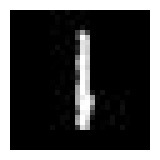

[(0.0, 28.0), (28.0, 0.0), None]

In [277]:
import numpy as np
from torch import optim
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt

ndata=data.view(4,28,28).detach().numpy()
print(data)
print(type(ndata))
scale = 5

im_data = ndata[0]

print(type(im_data))

dpi = matplotlib.rcParams['figure.dpi']
height, width = im_data.shape
figsize = scale * width / float(dpi), scale * height / float(dpi)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])
# Hide spines, ticks, etc.
ax.axis('off')
ax.imshow(im_data, vmin=0, vmax=1, cmap='gray')
plt.show()
ax.set(xlim=[0, width], ylim=[height, 0], aspect=1)

### Principal Component Analysis

<p> Normalize the data</p>

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# check minimum and maximum values of the image data
print(np.min(ndata))
print(np.max(ndata))

# normalize image data
ndata = ndata/255

# check minimum and maximum values of the image data again
print(np.min(ndata))
print(np.max(ndata))


0.0
1.0
0.0
0.003921569


<p> Flatten and reshape data </p>

In [279]:
print(ndata.shape)
ndata_flat = ndata.reshape(-1,3136)

(4, 28, 28)


<p> Use PCA to reduce the dimensionality of the data from a (4, 28, 28) tensor to essentially a single point containing 90% of the data </p>

In [280]:
pca = PCA(0.9)
pca.fit(ndata_flat)

data = pca.transform(ndata_flat)

data.shape

/home/thomas/.local/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:541: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


(1, 1)